# Extensions to Linear Models - Lab

## Introduction

In this lab, you'll practice many concepts you have learned so far, from adding interactions and polynomials to your model to regularization!

## Summary

You will be able to:

- Build a linear regression model with interactions and polynomial features 
- Use feature selection to obtain the optimal subset of features in a dataset

## Let's Get Started!

Below we import all the necessary packages for this lab.

In [1]:
# Run this cell without changes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Load the data.

In [2]:
# Run this cell without changes

# Load data from CSV
df = pd.read_csv("ames.csv")
# Subset columns
df = df[['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
         '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd',
         'GarageArea', 'Fireplaces', 'SalePrice']]

# Split the data into X and y
y = df['SalePrice']
X = df.drop(columns='SalePrice')

# Split into train, test, and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=0)

## Build a Baseline Housing Data Model

Above, we imported the Ames housing data and grabbed a subset of the data to use in this analysis.

Next steps:

- Scale all the predictors using `StandardScaler`, then convert these scaled features back into DataFrame objects
- Build a baseline `LinearRegression` model using *scaled variables* as predictors and use the $R^2$ score to evaluate the model 

In [3]:
# Your code here

# Scale X_train and X_test using StandardScaler
scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Ensure X_train and X_test are scaled DataFrames
# (hint: you can set the columns using X.columns)
X_train = pd.DataFrame(X_trained_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train

,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,Fireplaces
0,-0.114710,-0.099842,-0.509252,-0.639316,-0.804789,1.261552,0.499114,0.250689,0.327629,-0.994820
1,-0.176719,0.632038,-0.509252,0.838208,0.641608,-0.808132,-0.247249,-0.365525,0.079146,-0.994820
2,-0.246336,-0.831723,1.304613,-0.012560,-0.329000,-0.808132,-0.944766,-0.981739,-1.105931,-0.994820
3,-0.378617,-0.831723,1.304613,-0.339045,-0.609036,-0.808132,-1.146010,-0.981739,-1.134602,0.588023
4,-0.010898,-1.563603,1.304613,-2.531499,-1.315922,0.550523,-0.481708,0.250689,-2.281450,-0.994820
...,...,...,...,...,...,...,...,...,...,...
816,-0.532331,-0.099842,-0.509252,-0.510628,-0.897228,-0.808132,-1.353116,-2.214167,-0.274466,0.588023
817,-0.309245,-0.099842,-0.509252,0.514106,0.315353,-0.808132,-0.481708,-0.365525,0.088703,-0.994820
818,0.119419,0.632038,-0.509252,-0.513011,-0.899947,1.684999,0.796096,0.866903,-0.207566,0.588023
819,-0.002718,-0.099842,1.304613,-0.889542,-1.329516,0.783758,-0.290233,-0.365525,-0.852668,-0.994820


In [4]:
# Your code here

# Create a LinearRegression model and fit it on scaled training data
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# Calculate a baseline r-squared score on training data
baseline = linreg.score(X_train, y_train)
baseline

0.7868344817421309

## Add Interactions

Instead of adding all possible interaction terms, let's try a custom technique. We are only going to add the interaction terms that increase the $R^2$ score as much as possible. Specifically we are going to look for the 7 interaction terms that each cause the most increase in the coefficient of determination.

### Find the Best Interactions

Look at all the possible combinations of variables for interactions by adding interactions one by one to the baseline model. Create a data structure that stores the pair of columns used as well as the $R^2$ score for each combination.

***Hint:*** We have imported the `combinations` function from `itertools` for you ([documentation here](https://docs.python.org/3/library/itertools.html#itertools.combinations)). Try applying this to the columns of `X_train` to find all of the possible pairs.

Print the 7 interactions that result in the highest $R^2$ scores.

In [5]:
# Your code here

# Set up data structure
interactions = []

# Find combinations of columns and loop over them
column_pairs = list(combinations(X_train.columns, 2))
for (col1, col2) in column_pairs:
    # Make copies of X_train and X_test
    features_train = X_train.copy()
    features_test = X_test.copy()
    
    # Add interaction term to data
    features_train['interaction'] = features_train[col1] * features_train[col2]
    features_test['interaction'] = features_test[col1] * features_test[col2]
    
    # Find r-squared score (fit on training data, evaluate on test data)
    score = LinearRegression().fit(features_train, y_train).score(features_test, y_test)
    
    # Append to data structure
    interactions.append(((col1, col2), score))
    
# Sort and subset the data structure to find the top 7
top_7_interactions = sorted(interactions, key=lambda record: record[1], reverse=True)[:7]
print('Top 7 Interactions: ')
print(top_7_interactions)

Top 7 Interactions: 
[(('LotArea', '1stFlrSF'), 0.7211105666140569), (('LotArea', 'TotalBsmtSF'), 0.7071649207050108), (('LotArea', 'GrLivArea'), 0.6690980823779027), (('LotArea', 'Fireplaces'), 0.6529699515652585), (('2ndFlrSF', 'TotRmsAbvGrd'), 0.647299489040519), (('OverallCond', 'TotalBsmtSF'), 0.6429019879233769), (('OverallQual', '2ndFlrSF'), 0.6422324294284367)]


### Add the Best Interactions

Write code to include the 7 most important interactions in `X_train` and `X_test` by adding 7 columns. Use the naming convention `"col1_col2"`, where `col1` and `col2` are the two columns in the interaction.

In [6]:
# Your code here

# Loop over top 7 interactions
for record in top_7_interactions:
    # Extract column names from data structure
    col1, col2 = record[0]
    # Construct new column name
    column_name = col1 + '_' + col2
    # Add new column to X_train and X_test
    X_train[column_name] = X_train[col1] + X_train[col2]
    X_test[column_name] = X_test[col1] + X_test[col2]
    
X_train

,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,Fireplaces,LotArea_1stFlrSF,LotArea_TotalBsmtSF,LotArea_GrLivArea,LotArea_Fireplaces,2ndFlrSF_TotRmsAbvGrd,OverallCond_TotalBsmtSF,OverallQual_2ndFlrSF
0,-0.114710,-0.099842,-0.509252,-0.639316,-0.804789,1.261552,0.499114,0.250689,0.327629,-0.994820,-0.919499,-0.754026,0.384404,-1.109530,1.512240,-1.148568,1.161709
1,-0.176719,0.632038,-0.509252,0.838208,0.641608,-0.808132,-0.247249,-0.365525,0.079146,-0.994820,0.464889,0.661488,-0.423968,-1.171539,-1.173657,0.328956,-0.176094
2,-0.246336,-0.831723,1.304613,-0.012560,-0.329000,-0.808132,-0.944766,-0.981739,-1.105931,-0.994820,-0.575337,-0.258896,-1.191102,-1.241156,-1.789871,1.292053,-1.639854
3,-0.378617,-0.831723,1.304613,-0.339045,-0.609036,-0.808132,-1.146010,-0.981739,-1.134602,0.588023,-0.987653,-0.717662,-1.524628,0.209406,-1.789871,0.965568,-1.639854
4,-0.010898,-1.563603,1.304613,-2.531499,-1.315922,0.550523,-0.481708,0.250689,-2.281450,-0.994820,-1.326820,-2.542398,-0.492607,-1.005718,0.801211,-1.226886,-1.013080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,-0.532331,-0.099842,-0.509252,-0.510628,-0.897228,-0.808132,-1.353116,-2.214167,-0.274466,0.588023,-1.429559,-1.042959,-1.885447,0.055693,-3.022299,-1.019880,-0.907974
817,-0.309245,-0.099842,-0.509252,0.514106,0.315353,-0.808132,-0.481708,-0.365525,0.088703,-0.994820,0.006108,0.204860,-0.790954,-1.304065,-1.173657,0.004854,-0.907974
818,0.119419,0.632038,-0.509252,-0.513011,-0.899947,1.684999,0.796096,0.866903,-0.207566,0.588023,-0.780528,-0.393593,0.915515,0.707442,2.551901,-1.022264,2.317037
819,-0.002718,-0.099842,1.304613,-0.889542,-1.329516,0.783758,-0.290233,-0.365525,-0.852668,-0.994820,-1.332233,-0.892259,-0.292951,-0.997538,0.418233,0.415072,0.683916


## Add Polynomials

Now let's repeat that process for adding polynomial terms.

### Find the Best Polynomials

Try polynomials of degrees 2, 3, and 4 for each variable, in a similar way you did for interactions (by looking at your baseline model and seeing how $R^2$ increases). Do understand that when going for a polynomial of degree 4 with `PolynomialFeatures`, the particular column is raised to the power of 2 and 3 as well in other terms.

We only want to include "pure" polynomials, so make sure no interactions are included.

Once again you should make a data structure that contains the values you have tested. We recommend a list of tuples of the form:

`(col_name, degree, R2)`, so eg. `('OverallQual', 2, 0.781)` 

In [7]:
# Your code here

# Set up data structure
polynomials = []
# Loop over all columns
for col in X_train.columns:
    # Loop over degrees 2, 3, 4
    for degree in (2, 3, 4):  
        # Make a copy of X_train and X_test
        features_train = X_train.copy().reset_index()
        features_test = X_test.copy().reset_index()
        # Instantiate PolynomialFeatures with relevant degree
        poly = PolynomialFeatures(degree, include_bias=False)
        # Fit polynomial to column and transform column
        # Hint: use the notation df[[column_name]] to get the right shape
        # Hint: convert the result to a DataFrame
        col_transformed_train = pd.DataFrame(poly.fit_transform(features_train[[col]]))
        col_transformed_test = pd.DataFrame(poly.transform(features_test[[col]]))
                                            
        # Add polynomial to data
        # Hint: use pd.concat since you're combining two DataFrames
        # Hint: drop the column before combining so it doesn't appear twice
        features_train = pd.concat([features_train.drop(col, axis=1), col_transformed_train], axis=1)
        features_test = pd.concat([features_test.drop(col, axis=1), col_transformed_test], axis=1)
        # Find r-squared score
        score = LinearRegression().fit(features_train, y_train).score(features_test, y_test)
        # Append to data structure
        polynomials.append((col, degree, score))
# Sort and subset the data structure to find the top 7
top_7_polynomials = sorted(polynomials, key=lambda record: record[-1], reverse=True)[:7]
print("Top 7 Polynomials:")
print(top_7_polynomials)

Top 7 Polynomials:
[('GrLivArea', 3, 0.8042244872834253), ('GrLivArea', 4, 0.7947020524067622), ('LotArea_TotalBsmtSF', 4, 0.7661902366596481), ('OverallCond_TotalBsmtSF', 3, 0.7602206846320501), ('LotArea_1stFlrSF', 4, 0.7548243117462642), ('LotArea_GrLivArea', 4, 0.7284230350694476), ('LotArea_1stFlrSF', 3, 0.6844548537963949)]


### Add the Best Polynomials

If there are duplicate column values in the results above, don't add multiple of them to the model, to avoid creating duplicate columns. (For example, if column `A` appeared in your list as both a 2nd and 3rd degree polynomial, adding both would result in `A` squared being added to the features twice.) Just add in the polynomial that results in the highest R-Squared.

In [8]:
top_polynomials = pd.DataFrame(top_7_polynomials, columns=["Column", "Degree", "R^2"])
top_polynomials

,Column,Degree,R^2
0,GrLivArea,3,0.804224
1,GrLivArea,4,0.794702
2,LotArea_TotalBsmtSF,4,0.766190
3,OverallCond_TotalBsmtSF,3,0.760221
4,LotArea_1stFlrSF,4,0.754824
5,LotArea_GrLivArea,4,0.728423
6,LotArea_1stFlrSF,3,0.684455


In [9]:

# Filter out duplicates
top_polynomials.drop_duplicates(subset="Column", inplace=True)
top_polynomials

,Column,Degree,R^2
0,GrLivArea,3,0.804224
2,LotArea_TotalBsmtSF,4,0.766190
3,OverallCond_TotalBsmtSF,3,0.760221
4,LotArea_1stFlrSF,4,0.754824
5,LotArea_GrLivArea,4,0.728423


In [10]:
# Your code here

# Loop over remaining results
for (col, degree, _) in top_polynomials.values:
    # Create polynomial terms
    poly = PolynomialFeatures(degree, include_bias=False)
    col_transformed_train = pd.DataFrame(poly.fit_transform(X_train[[col]]),
                                        columns=poly.get_feature_names([col]))
    col_transformed_test = pd.DataFrame(poly.transform(X_test[[col]]),
                                       columns=poly.get_feature_names([col]))
    # Concat new polynomials to X_train and X_test
    X_train = pd.concat([X_train.drop(col, axis=1), col_transformed_train], axis=1)
    X_test = pd.concat([X_test.drop(col, axis=1), col_transformed_test], axis=1)

Check out your final data set and make sure that your interaction terms as well as your polynomial terms are included.

In [11]:
# Your code here
X_train.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,GarageArea,Fireplaces,LotArea_Fireplaces,...,OverallCond_TotalBsmtSF^2,OverallCond_TotalBsmtSF^3,LotArea_1stFlrSF,LotArea_1stFlrSF^2,LotArea_1stFlrSF^3,LotArea_1stFlrSF^4,LotArea_GrLivArea,LotArea_GrLivArea^2,LotArea_GrLivArea^3,LotArea_GrLivArea^4
0,-0.114710,-0.099842,-0.509252,-0.639316,-0.804789,1.261552,0.250689,0.327629,-0.994820,-1.109530,...,1.319208,-1.515200,-0.919499,0.845479,-0.777417,0.714834,0.384404,0.147766,0.056802,0.021835
1,-0.176719,0.632038,-0.509252,0.838208,0.641608,-0.808132,-0.365525,0.079146,-0.994820,-1.171539,...,0.108212,0.035597,0.464889,0.216122,0.100473,0.046709,-0.423968,0.179749,-0.076208,0.032310
2,-0.246336,-0.831723,1.304613,-0.012560,-0.329000,-0.808132,-0.981739,-1.105931,-0.994820,-1.241156,...,1.669402,2.156956,-0.575337,0.331012,-0.190444,0.109569,-1.191102,1.418725,-1.689847,2.012781
3,-0.378617,-0.831723,1.304613,-0.339045,-0.609036,-0.808132,-0.981739,-1.134602,0.588023,0.209406,...,0.932322,0.900221,-0.987653,0.975458,-0.963414,0.951519,-1.524628,2.324489,-3.543980,5.403249
4,-0.010898,-1.563603,1.304613,-2.531499,-1.315922,0.550523,0.250689,-2.281450,-0.994820,-1.005718,...,1.505249,-1.846769,-1.326820,1.760452,-2.335802,3.099189,-0.492607,0.242661,-0.119537,0.058885


## Full Model R-Squared

Check out the $R^2$ of the full model with your interaction and polynomial terms added. Print this value for both the train and test data.

In [12]:
# Your code here
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"Train R^2: {lr.score(X_train, y_train)}")
print(f"Test R^2: {lr.score(X_test, y_test)}")

Train R^2: 0.8242179451079745
Test R^2: -4.480200083646158


It looks like we may be overfitting some now. Let's try some feature selection techniques.

## Feature Selection

First, test out `RFE` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)) with several different `n_features_to_select` values. For each value, print out the train and test $R^2$ score and how many features remain.

In [13]:
# Your code here
for n in [5, 10, 15, 20, 25]:
    rfe = RFE(LinearRegression(), n_features_to_select=n)
    X_rfe_train = rfe.fit_transform(X_train, y_train)
    X_rfe_test = rfe.transform(X_test)
    
    lr = LinearRegression()
    lr.fit(X_rfe_train, y_train)
    
    print(f"Train R^2: {lr.score(X_rfe_train, y_train)}")
    print(f"Test R^2: {lr.score(X_rfe_test, y_test)}")
    print(f"Using {n} out of {X_train.shape[1]} features\n")

Train R^2: 0.776039994126505
Test R^2: 0.635298172527236
Using 5 out of 30 features

Train R^2: 0.7918483775997607
Test R^2: 0.532652216202171
Using 10 out of 30 features

Train R^2: 0.8115394056602737
Test R^2: 0.7262677480325536
Using 15 out of 30 features

Train R^2: 0.812426245402104
Test R^2: 0.6722241832969742
Using 20 out of 30 features

Train R^2: 0.8165639410135106
Test R^2: 0.783896878404902
Using 25 out of 30 features



Now test out `Lasso` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)) with several different `alpha` values.

In [14]:
# Your code here
for alpha in [1, 10, 100, 1000, 10000]:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    
    print(f"Train R^2: {lasso.score(X_train, y_train)}")
    print(f"Test R^2: {lasso.score(X_test, y_test)}")
    print(f"Using {sum(abs(lasso.coef_) < 10**(-10))} out of {X_train.shape[1]} features")
    print(f"and an alpha of {alpha}\n")

Train R^2: 0.8204193494393007
Test R^2: 0.6363474521277239
Using 0 out of 30 features
and an alpha of 1

Train R^2: 0.820417942602647
Test R^2: 0.6294087430175772
Using 2 out of 30 features
and an alpha of 10

Train R^2: 0.8204567243745902
Test R^2: 0.6652544939651646
Using 8 out of 30 features
and an alpha of 100

Train R^2: 0.8190380394893275
Test R^2: 0.7665272961999722
Using 9 out of 30 features
and an alpha of 1000

Train R^2: 0.7675686577291351
Test R^2: 0.054039646908213945
Using 17 out of 30 features
and an alpha of 10000



Compare the results. Which features would you choose to use?

In [15]:
# Your written answer here
"""
For RFE the model with best test R-Squared was using 15 features.

For Lasso the model with the best test R-Squared was using 12 features with alpha of 1000.

The Lasso result was better so we would go with the Lasso technique and 12 features.
"""

'\nFor RFE the model with best test R-Squared was using 15 features.\n\nFor Lasso the model with the best test R-Squared was using 12 features with alpha of 1000.\n\nThe Lasso result was better so we would go with the Lasso technique and 12 features.\n'

## Evaluate Final Model on Validation Data

### Data Preparation

At the start of this lab, we created `X_val` and `y_val`. Prepare `X_val` the same way that `X_train` and `X_test` have been prepared. This includes scaling, adding interactions, and adding polynomial terms.

In [16]:
# Your code here
# Scale X_val
X_val_scaled = scaler.transform(X_val)
X_val = pd.DataFrame(X_val_scaled, columns=X.columns)
# Add interaction terms to X_val
for record in top_7_interactions:
    col1, col2 = record[0]
    new_col_name = col1 + "_" + col2
    X_val[new_col_name] = X_val[col1] * X_val[col2]
    
# Add polynomials to X_val
for (col, degree, _) in top_polynomials.values:
    poly = PolynomialFeatures(degree, include_bias=False)
    col_transformed_val = pd.DataFrame(poly.fit_transform(X_val[[col]]),
                                      columns=poly.get_feature_names([col]))
    X_val = pd.concat([X_val.drop(col, axis=1), col_transformed_val], axis=1)

### Evaluation

Using either `RFE` or `Lasso`, fit a model on the complete train + test set, then find R-Squared and MSE values for the validation set.

In [24]:
# Your code here
final_model = Lasso(alpha=10000)
final_model.fit(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))

print(f"R-Squared: {final_model.score(X_val, y_val)}")
print(f"MSE: {mean_squared_error(y_val, final_model.predict(X_val))}")

R-Squared: 0.2477911133744738
MSE: 5269455722.7278805


## Level Up Ideas (Optional)

### Create a Lasso Path

From this section, you know that when using `Lasso`, more parameters shrink to zero as your regularization parameter goes up. In scikit-learn there is a function `lasso_path()` which visualizes the shrinkage of the coefficients while $alpha$ changes. Try this out yourself!

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

### AIC and BIC for Subset Selection

This notebook shows how you can use AIC and BIC purely for feature selection. Try this code out on our Ames housing data!

https://xavierbourretsicotte.github.io/subset_selection.html

In [27]:
from itertools import cycle

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import enet_path, lasso_path

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X_val, y_val, eps=eps, l1_ratio=0.8, positive=True
)


Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


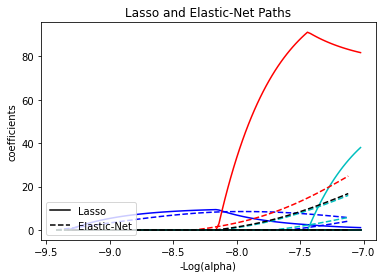

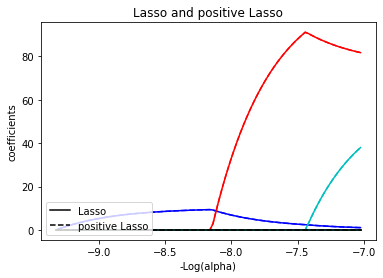

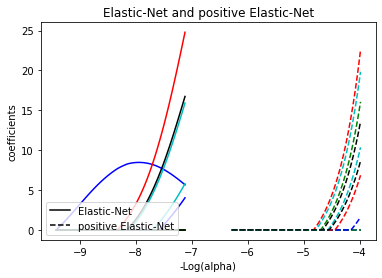

In [28]:
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower left")
plt.axis("tight")


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for coef_e, coef_pe, c in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower left")
plt.axis("tight")
plt.show()

## Summary

Congratulations! You now know how to apply concepts of bias-variance tradeoff using extensions to linear models and feature selection.